<h3>Leitura de Imagem</h3>

In [1]:
%matplotlib inline

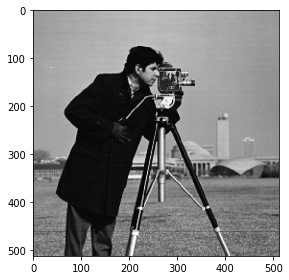

In [2]:
from skimage import data
import skimage.io as io
camera = data.camera()
io.imshow(camera)

<h3>Filtro passa-baixa - Exemplo de medida de qualidade</h3>

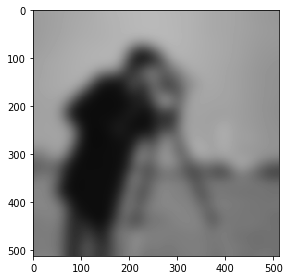

In [3]:
# application of Gaussian filter to the image
import skimage.filters as filter
res_image = filter.gaussian(camera, [15,15])
io.imshow(res_image);

In [4]:
# RMSE obtained with the Gaussian filter
from skimage import util
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
res_image = util.img_as_ubyte(res_image)
mse = mean_squared_error(res_image,camera)
print('rmse: %f'% sqrt(mse))

rmse: 29.947588


<h3> Filtro Passa-alta</h3>

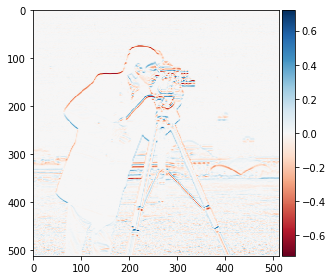

In [5]:
# application of prewitt filter to the image to detect horizontal edges
import skimage.filters as filter
res_image = filter.prewitt_h(camera)
io.imshow(res_image);

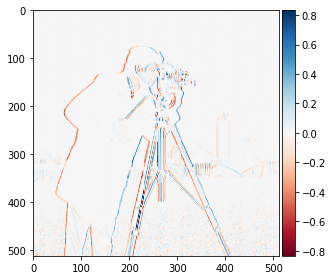

In [6]:
# application of prewitt filter to the image to detect vertical edges
import skimage.filters as filter
res_image = filter.prewitt_v(camera)
io.imshow(res_image);

<h3>Ruído Sal e Pimenta</h3>

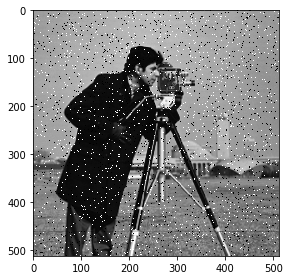

In [7]:
# add salt-and-pepper noise to the camera image
import skimage.util as util
imsp = util.random_noise(camera, mode='s&p')
imsp = util.img_as_ubyte(imsp)
io.imshow(imsp)

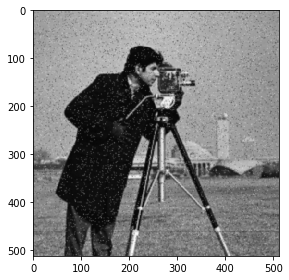

In [8]:
# apply Gaussian filter to the noisy image
import skimage.filters as filter
import skimage.util as util
noise_gaussian = filter.gaussian(imsp, 1)
noise_gaussian = util.img_as_ubyte(noise_gaussian)
io.imshow(noise_gaussian);

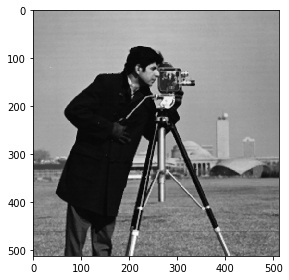

In [9]:
# apply the median filter to the noisy image
import skimage.filters as filter
from skimage.morphology import rectangle
from skimage.filters.rank import median
noise_median = median(imsp, rectangle(3,3))
io.imshow(noise_median);

In [10]:
# RMSE between corrupted and original image
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(imsp,camera)
print('rmse: %f'% sqrt(mse))

rmse: 31.863764


In [11]:
# RMSE betwee restaured with median and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_median,camera)
print('rmse: %f'% sqrt(mse))

rmse: 4.134662


In [12]:
# RMSE betwee restaured with Gaussian and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_gaussian,camera)
print('rmse: %f'% sqrt(mse))

rmse: 11.158049


<h3>Ruído Gaussiano</h3>

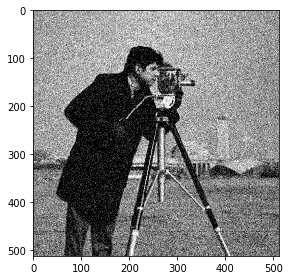

In [13]:
# add Gaussian noise to the camera image
import skimage.util as util
imGauss = util.random_noise(camera, mode='gaussian')
imGauss = util.img_as_ubyte(imGauss)
io.imshow(imGauss)

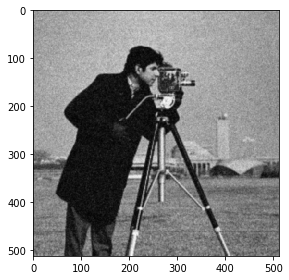

In [14]:
# apply Gaussian filter to the noisy image
import skimage.filters as filter
import skimage.util as util
noise_gaussian = filter.gaussian(imGauss, 1)
noise_gaussian = util.img_as_ubyte(noise_gaussian)
io.imshow(noise_gaussian);

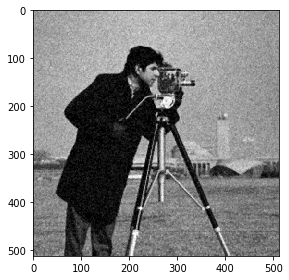

In [15]:
# apply the median filter to the noisy image
import skimage.filters as filter
from skimage.morphology import rectangle
from skimage.filters.rank import median
noise_median = median(imGauss, rectangle(3,3))
io.imshow(noise_median);

In [16]:
# RMSE between corrupted and original image
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(imGauss,camera)
print('rmse: %f'% sqrt(mse))

rmse: 24.340425


In [17]:
# RMSE betwee restaured with median and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_median,camera)
print('rmse: %f'% sqrt(mse))

rmse: 11.246222


In [18]:
# RMSE betwee restaured with Gaussian and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_gaussian,camera)
print('rmse: %f'% sqrt(mse))

rmse: 9.157162


<h3>Entropia Local </h3>

C:\Users\william\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


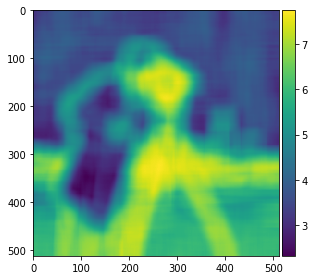

In [19]:
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import rectangle
img = data.camera()
ent = entropy(img, rectangle(50,50))
io.imshow(ent);

<h3>Teste da OpenCV</h3>

In [20]:
import cv2
cv2.__version__

'3.4.1'